# Higgs Kaggle dataset

In [88]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

from sklearn.model_selection import train_test_split

from keras.layers import Dense
from keras.models import Sequential
import tensorflow  as tf

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

## Data
*****
- Technical documentation [here](https://higgsml.ijclab.in2p3.fr/documentation/)

In [2]:
df = pd.read_csv("/Users/rpezoa/higgs-boson/training.csv")

In [3]:
mask_positive = df["Label"] == 's'
mask_negative = ~mask_positive

In [4]:
df.loc[mask_positive, "Label"] = 1
df.loc[mask_negative, "Label"] = 0

In [5]:
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,0
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,0
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,0
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,0
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,0
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,1
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,0


In [6]:
values = df["Label"].value_counts()
print(values)

0    164333
1     85667
Name: Label, dtype: int64


Text(1.28, 150, '0.34%')

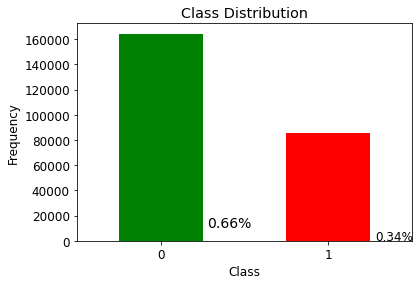

In [7]:
import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)


pd.value_counts(df["Label"]).plot.bar(rot=0, color=["green", "red"])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.text(0.28, 10500,str(round(values[0]/(values[0]+values[1]),2)) + "%", fontsize=14)
plt.text(1.28, 150,  str(round(values[1]/(values[0]+values[1]),2)) + "%", fontsize=12)



### Managing missing values  (-999.000)

In [8]:
def missing_values(df):
    df2 = df.copy()
    for feat in df2.columns:
        df2.loc[df2[feat] == -999.000, feat] = np.nan
    df2 = df2.fillna(df2.mean())
    return df2

    

In [9]:
df2 = missing_values(df)

In [10]:
df2

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000.0,138.470000,51.655,97.827,27.980,0.910000,124.71100,2.666000,3.064,41.928,...,2.0,67.435000,2.150000,0.444000,46.062000,1.240000,-2.475000,113.497,0.002653,1
1,100001.0,160.937000,68.768,103.235,48.146,2.403735,371.78336,-0.821688,3.473,2.078,...,1.0,46.226000,0.725000,1.158000,57.679474,-0.011845,-0.001582,46.226,2.233584,0
2,100002.0,121.858528,162.172,125.953,35.635,2.403735,371.78336,-0.821688,3.148,9.336,...,1.0,44.251000,2.053000,-2.028000,57.679474,-0.011845,-0.001582,44.251,2.347389,0
3,100003.0,143.905000,81.417,80.943,0.414,2.403735,371.78336,-0.821688,3.310,0.414,...,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,-0.000,5.446378,0
4,100004.0,175.864000,16.915,134.805,16.405,2.403735,371.78336,-0.821688,3.891,16.405,...,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,0.000,6.245333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995.0,121.858528,71.989,36.548,5.042,2.403735,371.78336,-0.821688,1.392,5.042,...,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,0.000,4.505083,0
249996,349996.0,121.858528,58.179,68.083,22.439,2.403735,371.78336,-0.821688,2.585,22.439,...,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,-0.000,2.497259,0
249997,349997.0,105.457000,60.526,75.839,39.757,2.403735,371.78336,-0.821688,2.390,22.183,...,1.0,41.992000,1.800000,-0.166000,57.679474,-0.011845,-0.001582,41.992,0.018636,1
249998,349998.0,94.951000,19.362,68.812,13.504,2.403735,371.78336,-0.821688,3.365,13.504,...,0.0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,0.000,1.681611,0


In [11]:
df2.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,...,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591,1.646767,0.342668
std,72168.927986,52.749898,35.344886,40.828691,63.655682,0.938491,214.230095,1.930801,0.782911,22.273494,...,0.977426,47.002359,1.382702,1.405048,17.229894,1.094446,0.978743,98.015662,1.875103,0.474603
min,100000.000000,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,...,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000,0.001502,0.000000
25%,162499.750000,95.665000,19.241000,59.388750,14.068750,2.403735,371.783360,-0.821688,1.810000,2.841000,...,0.000000,57.439000,-0.433000,-0.556000,57.679474,-0.011845,-0.001582,0.000000,0.018636,0.000000
50%,224999.500000,119.958000,46.524000,73.752000,38.467500,2.403735,371.783360,-0.821688,2.491500,12.315500,...,1.000000,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,40.512500,1.156188,0.000000
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,2.403735,371.783360,-0.821688,2.961000,27.591000,...,2.000000,84.822105,0.433000,0.503000,57.679474,-0.011845,-0.001582,109.933750,2.404128,1.000000
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543,1.000000


In [12]:
y = df["Label"]
y = y.astype(int)
weight = df["Weight"]
event_id = df["EventId"]
X = df.iloc[:,1:-2]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, 
                                                  test_size=0.2, random_state=0)
n_classes = 2

In [14]:
model = Sequential()
model.add(Dense(300, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(150, activation = "relu"))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
history = model.fit(X_train, y_train, epochs=20, 
                    verbose=1,validation_data = (X_val, y_val)) 





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               9300      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 54,601
Trainable params: 54,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5000/5000 [==============================] - 16s 3ms/step - loss: 3.9001 - accuracy: 0.6877 - precision: 0.5525 - recall: 0.4989 - val_loss: 0.4755 - val_accuracy: 0.7846 - val_precision: 0.7405 - val_recall: 0.5773
Epoch 2/20
5000/5000 [==============================] - 13s 3ms/step - loss: 0.5004 - accuracy: 0.7674 - precision: 0.6868 - recall: 0.5933 - val_loss: 0.4

In [89]:
def show_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure()
    plt.plot(train_loss,'r', label="train")
    plt.plot(val_loss,'g', label="validation")
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()
    
    
def show_hist(y_pred,y_test):
    import mplhep as hep
    # Score distribution
    f, axs = plt.subplots(1, 1, sharex=True, sharey=True)
    h_sig_test, bins_sig_test = np.histogram(y_pred[y_test == 1], bins=30)
    h_back_test, bins_back_test = np.histogram(y_pred[y_test == 0], bins=30)
    axs.set_title("DNN")
    hep.histplot([h_sig_test, h_back_test], bins_sig_test, ax=axs,label=["Test-S", "Test-B"])
    axs.legend()
    axs.set_xlabel("Score")
    axs.set_ylabel("Number of Events")
    plt.tight_layout()
    plt.show()
    
def show_metrics(y_pred,th):
    cm = confusion_matrix(y_test, y_pred>th)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Back", "Signal"])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    d = classification_report(y_test, y_pred > th,output_dict=True)
    display(pd.DataFrame.from_dict(d))
    return y_pred




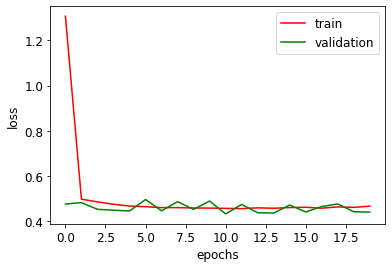

In [90]:
show_history(history)

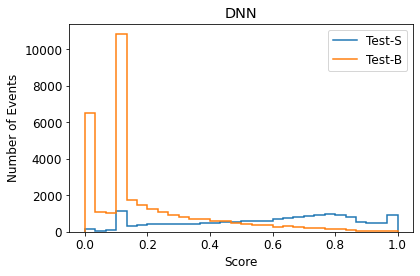

In [91]:
y_pred = model.predict(X_test)
show_hist(y_pred, y_test)

[[24516  8355]
 [ 2723 14406]]


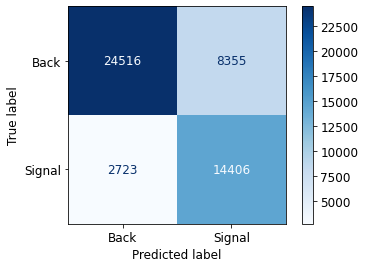

,0,1,accuracy,macro avg,weighted avg
precision,0.900033,0.632925,0.77844,0.766479,0.808527
recall,0.745825,0.841030,0.77844,0.793427,0.778440
f1-score,0.815705,0.722286,0.77844,0.768995,0.783701
support,32871.000000,17129.000000,0.77844,50000.000000,50000.000000


array([[1.38580441e-01],
       [9.40115390e-13],
       [2.98714042e-01],
       ...,
       [9.26904202e-01],
       [5.91028869e-01],
       [1.13536656e-01]], dtype=float32)

In [92]:
show_metrics(y_pred, th=0.25)

## Approaching Class imbalanced

In [103]:
model2 = Sequential()
model2.add(Dense(300, input_shape=(X_train.shape[1],), activation='relu'))
model2.add(Dense(150, activation = "relu"))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()
model2.compile(optimizer='rmsprop', loss= "binary_crossentropy", 
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
history2 = model2.fit(X_train, y_train, epochs=10, 
                    verbose=1,
                    validation_data = (X_val, y_val),
                    class_weight={0:1, 1:2})

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 300)               9300      
_________________________________________________________________
dense_40 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 151       
Total params: 54,601
Trainable params: 54,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5000/5000 [==============================] - 10s 2ms/step - loss: 6.7659 - accuracy: 0.6436 - precision_11: 0.4850 - recall_11: 0.6814 - val_loss: 0.5254 - val_accuracy: 0.7412 - val_precision_11: 0.5935 - val_recall_11: 0.7908
Epoch 2/10
5000/5000 [==============================] - 10s 2ms/step - loss: 0.7373 - accuracy: 0.7317 - precision_11: 0.5805 - recall_11: 0

In [104]:
model.loss


'binary_crossentropy'

In [105]:
y_pred2 = model2.predict(X_test)
print(y_pred)

[[1.38580441e-01]
 [9.40115390e-13]
 [2.98714042e-01]
 ...
 [9.26904202e-01]
 [5.91028869e-01]
 [1.13536656e-01]]


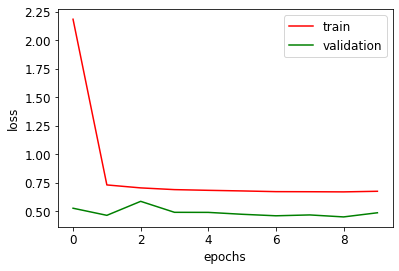

In [106]:
show_history(history2)

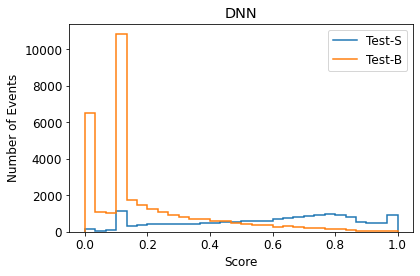

In [107]:
y_pred = model.predict(X_test)
show_hist(y_pred, y_test)

[[16770 16101]
 [ 1170 15959]]


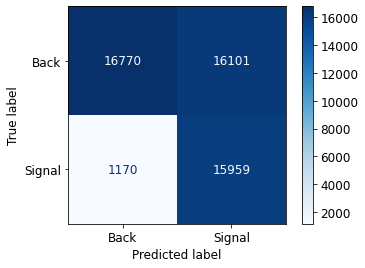

,0,1,accuracy,macro avg,weighted avg
precision,0.934783,0.497785,0.65458,0.716284,0.785076
recall,0.510176,0.931695,0.65458,0.720935,0.654580
f1-score,0.660093,0.648885,0.65458,0.654489,0.656254
support,32871.000000,17129.000000,0.65458,50000.000000,50000.000000


array([[4.8909351e-01],
       [7.2479248e-04],
       [4.4324765e-01],
       ...,
       [9.3077695e-01],
       [7.1566975e-01],
       [2.2427568e-01]], dtype=float32)

In [108]:
show_metrics(y_pred2, th=0.25)